In [1]:
""" First notebook looking at the merged sleep_position/o2 data """

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set(style="ticks")
sns.set_context(context="talk")

In [2]:
df = pd.read_csv("/Users/kmcmanus/Documents/classes/digitalhealth_project/data/formatted_data/20200526_sleep_pos_5S.csv",
                index_col='datetime', parse_dates=True, infer_datetime_format=True)
df['sleep_night'] = pd.to_datetime(df['sleep_night'])
df.head()

,Orientation,Inclination,sleep_night,SpO2(%),Pulse Rate(bpm),Motion,Vibration
datetime,,,,,,,
2020-03-31 20:42:00,-14.82,81.41,2020-03-31,NaN,NaN,NaN,NaN
2020-03-31 20:42:05,-14.87,82.20,2020-03-31,NaN,NaN,NaN,NaN
2020-03-31 20:42:10,-14.25,82.38,2020-03-31,NaN,NaN,NaN,NaN
2020-03-31 20:42:15,-14.89,81.73,2020-03-31,NaN,NaN,NaN,NaN
2020-03-31 20:42:20,-14.91,81.78,2020-03-31,NaN,NaN,NaN,NaN


In [3]:
print("Total # rows: {}".format(df.shape[0]))
df_subset = df.dropna()
print("# rows after na drop: {}".format(df_subset.shape[0]))

Total # rows: 967680
# rows after na drop: 100827


In [4]:
df_subset.describe()

,Orientation,Inclination,SpO2(%),Pulse Rate(bpm),Motion,Vibration
count,100827.000000,100827.000000,100827.000000,100827.000000,100827.000000,100827.000000
mean,-15.725180,92.354492,95.846916,61.313497,1.180706,0.049511
std,73.536082,17.457866,1.706815,4.603452,7.462625,2.516935
min,-179.630000,46.460000,79.000000,47.000000,0.000000,0.000000
25%,-79.740000,76.740000,95.000000,58.000000,0.000000,0.000000
50%,-14.530000,95.150000,96.000000,61.000000,0.000000,0.000000
75%,65.350000,106.130000,97.000000,64.000000,0.000000,0.000000
max,179.510000,178.910000,99.000000,93.000000,147.000000,128.000000


In [5]:
# How many days I have measurements for
dates = np.unique(df_subset.index.date)
print(dates)

[datetime.date(2020, 4, 21) datetime.date(2020, 4, 22)
 datetime.date(2020, 4, 23) datetime.date(2020, 4, 24)
 datetime.date(2020, 4, 25) datetime.date(2020, 4, 26)
 datetime.date(2020, 4, 27) datetime.date(2020, 4, 28)
 datetime.date(2020, 4, 29) datetime.date(2020, 4, 30)
 datetime.date(2020, 5, 1) datetime.date(2020, 5, 2)
 datetime.date(2020, 5, 3) datetime.date(2020, 5, 4)
 datetime.date(2020, 5, 5) datetime.date(2020, 5, 6)
 datetime.date(2020, 5, 7) datetime.date(2020, 5, 8)
 datetime.date(2020, 5, 9) datetime.date(2020, 5, 10)
 datetime.date(2020, 5, 11) datetime.date(2020, 5, 12)
 datetime.date(2020, 5, 13) datetime.date(2020, 5, 14)
 datetime.date(2020, 5, 15)]


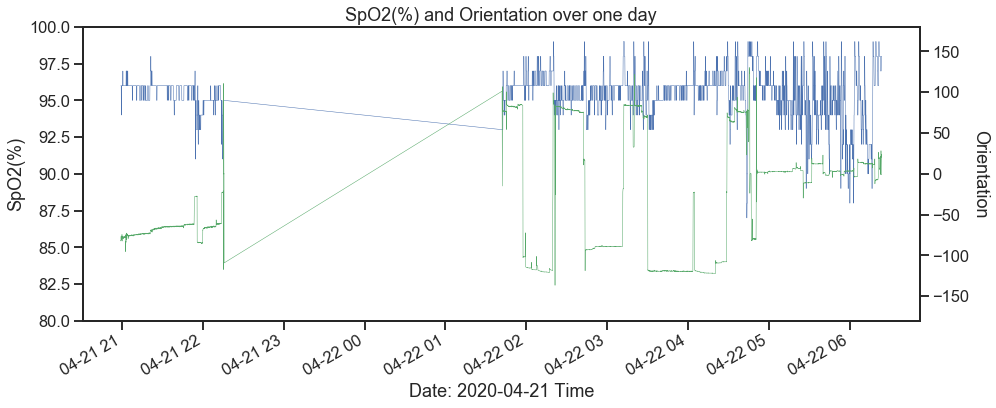

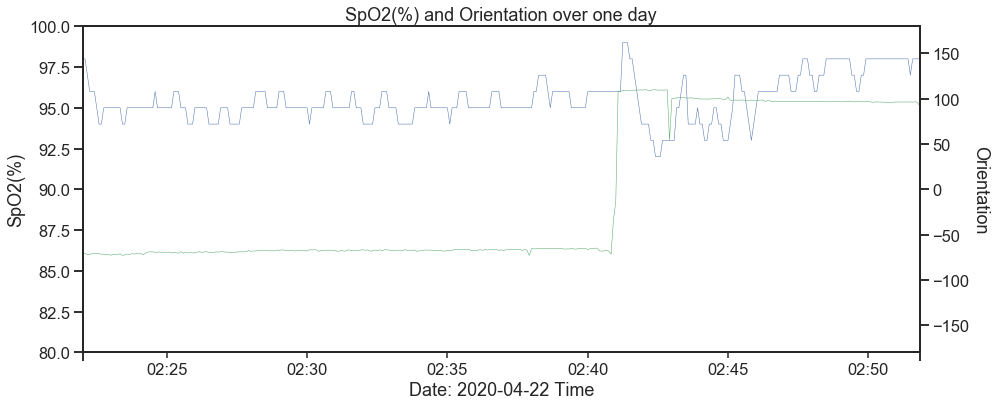

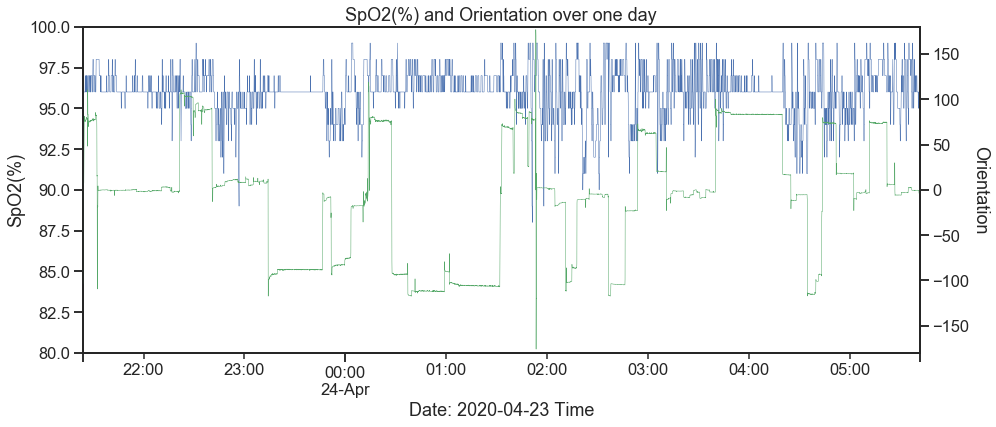

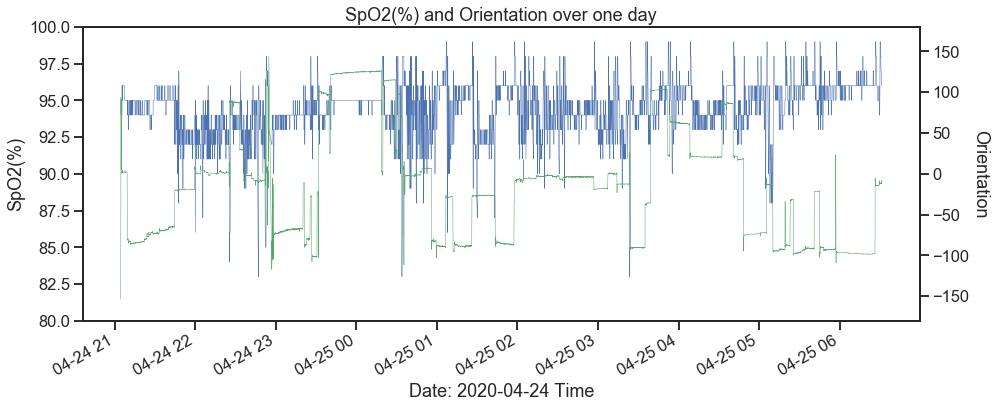

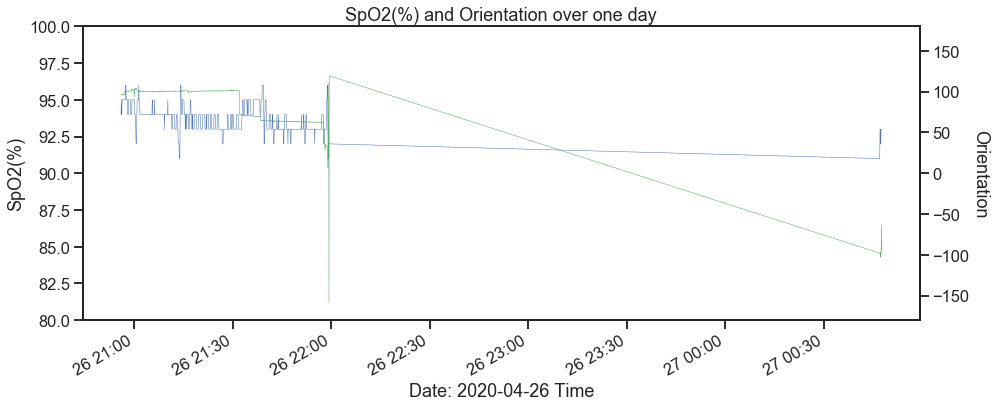

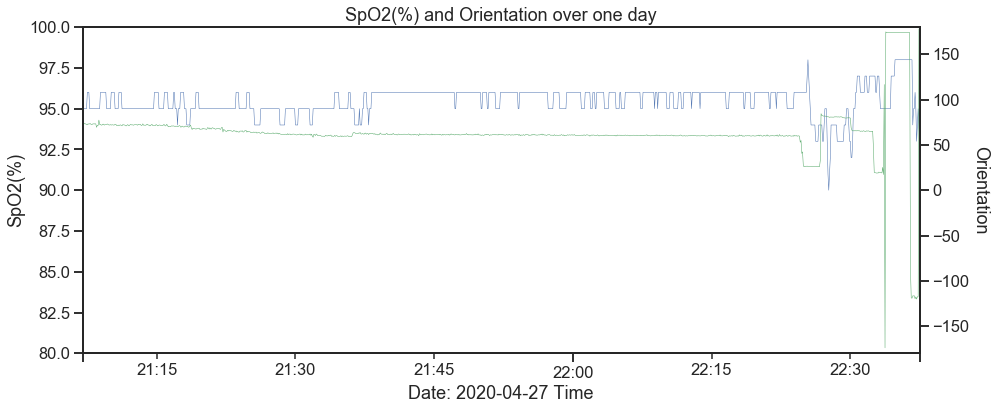

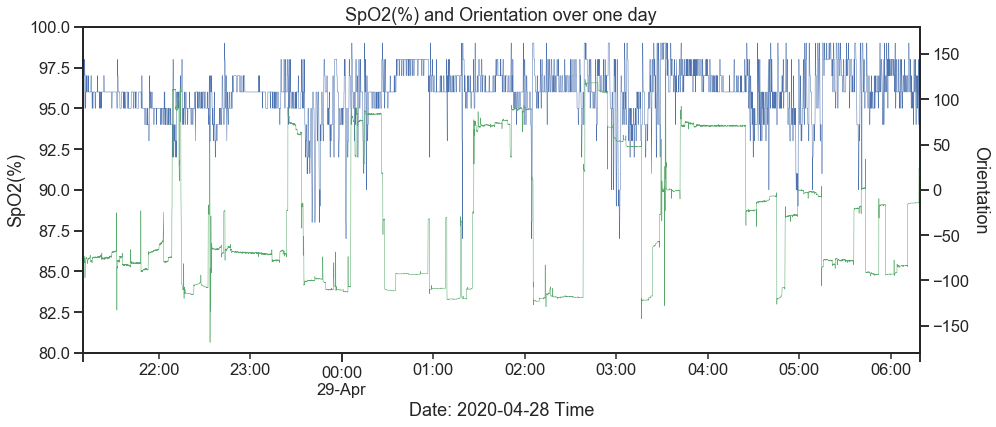

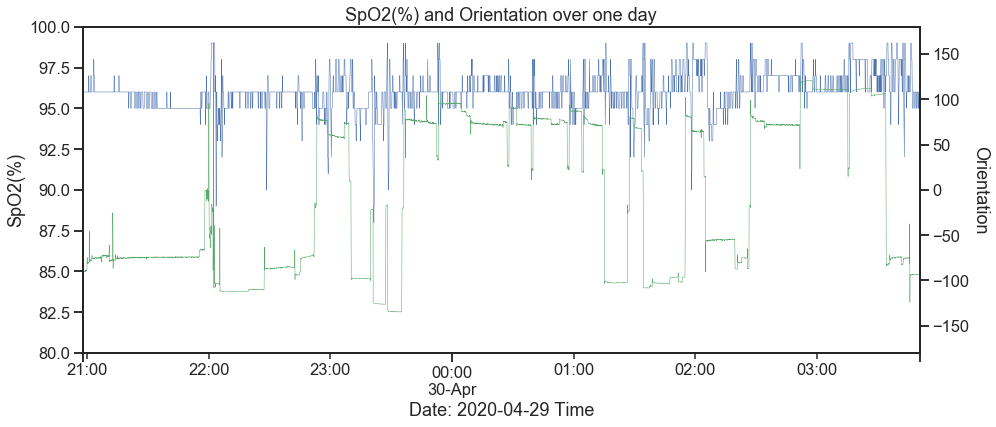

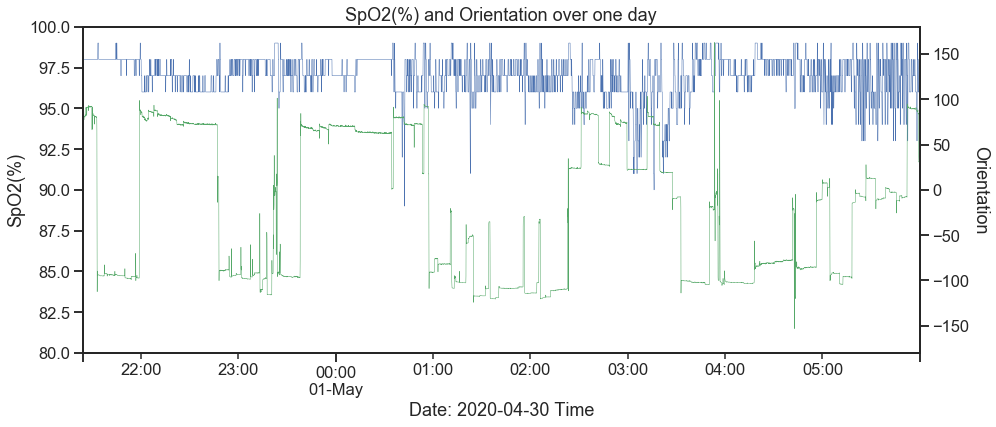

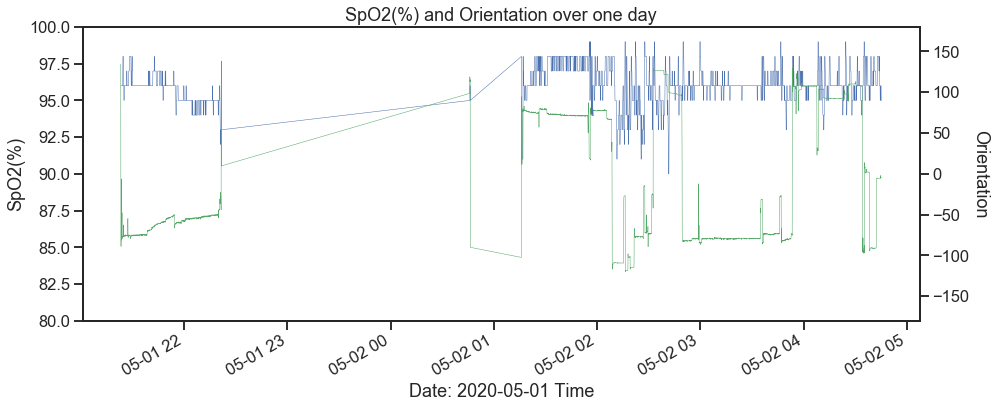

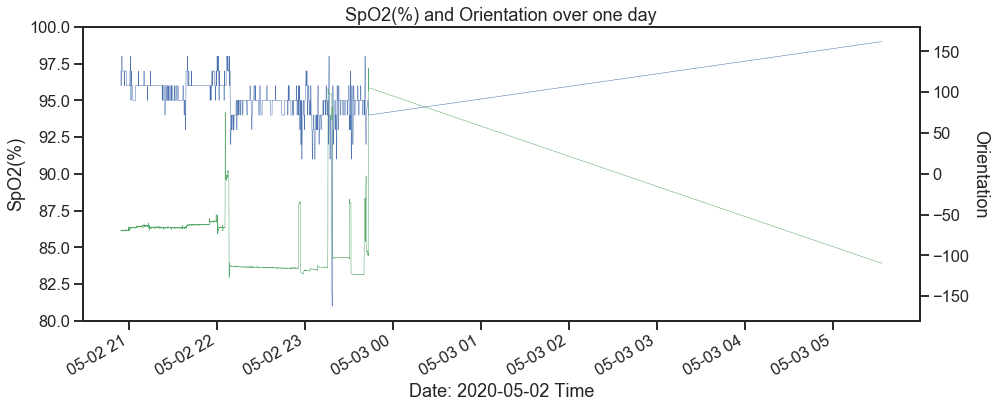

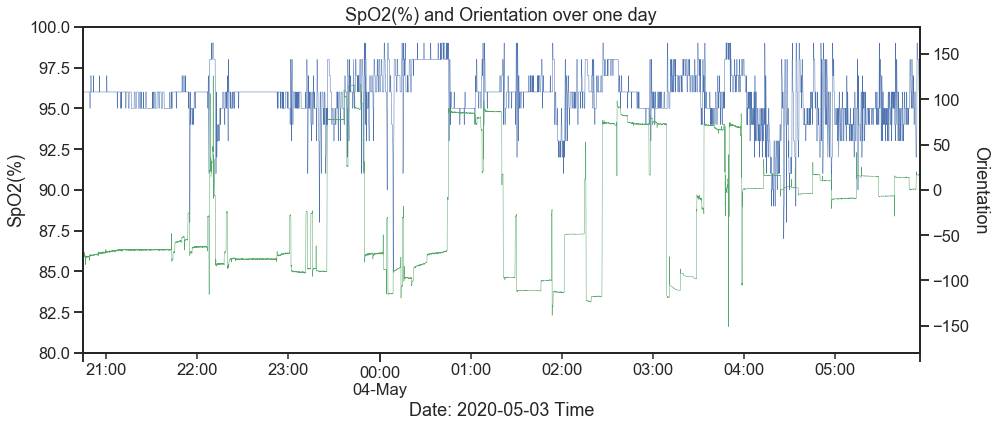

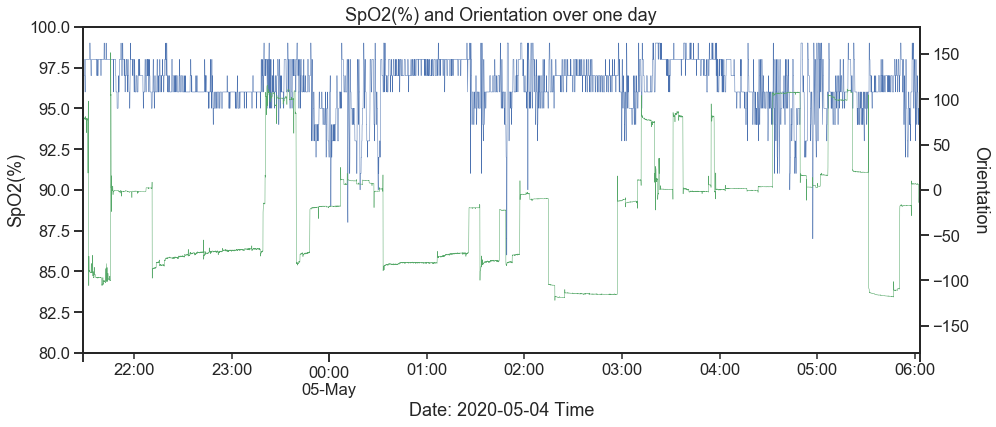

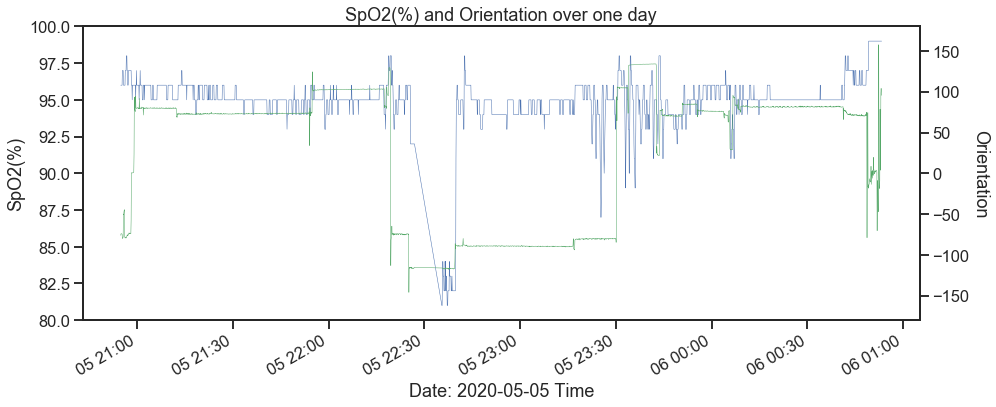

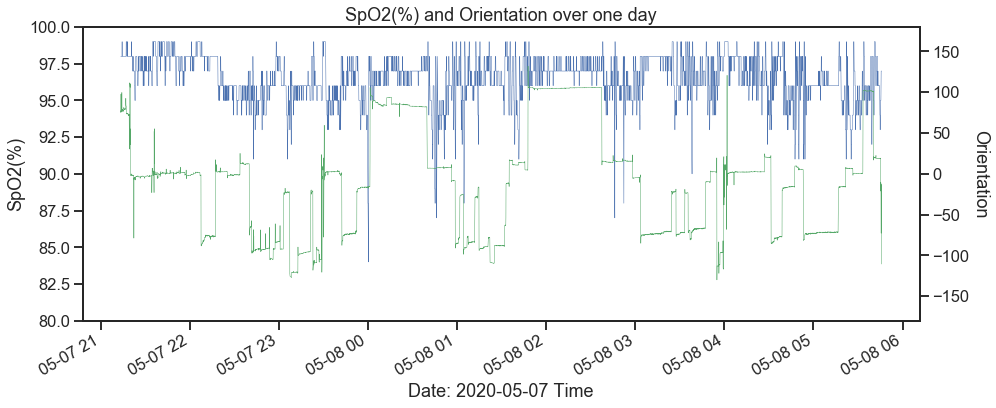

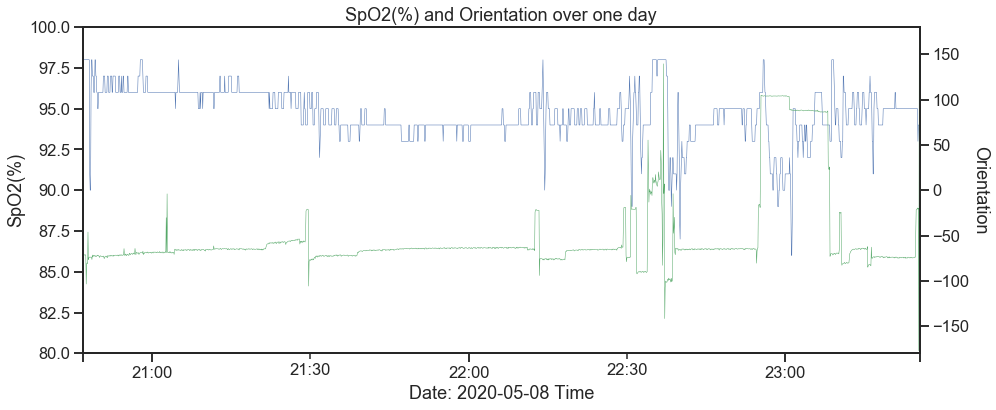

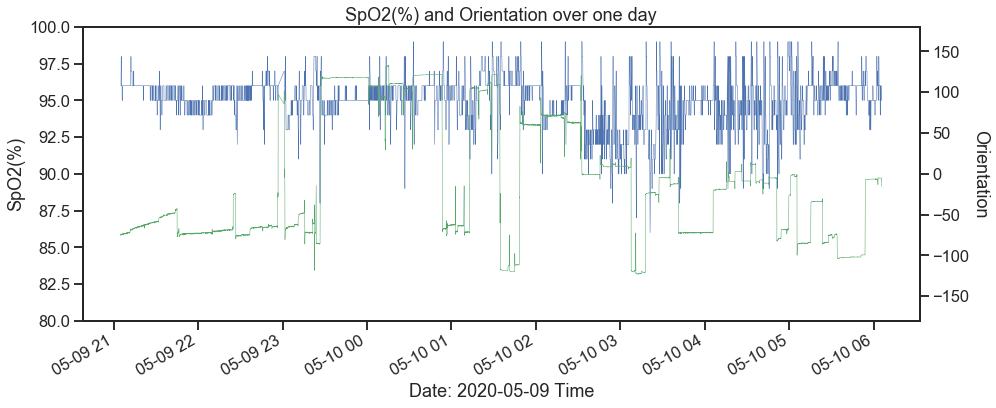

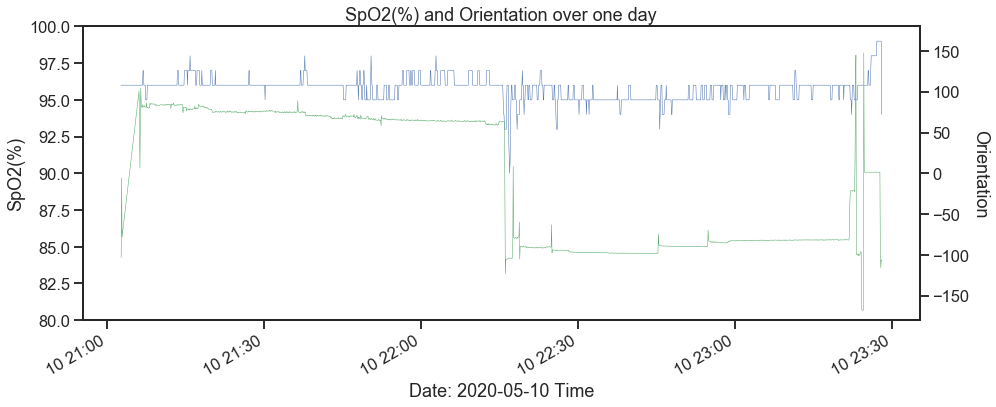

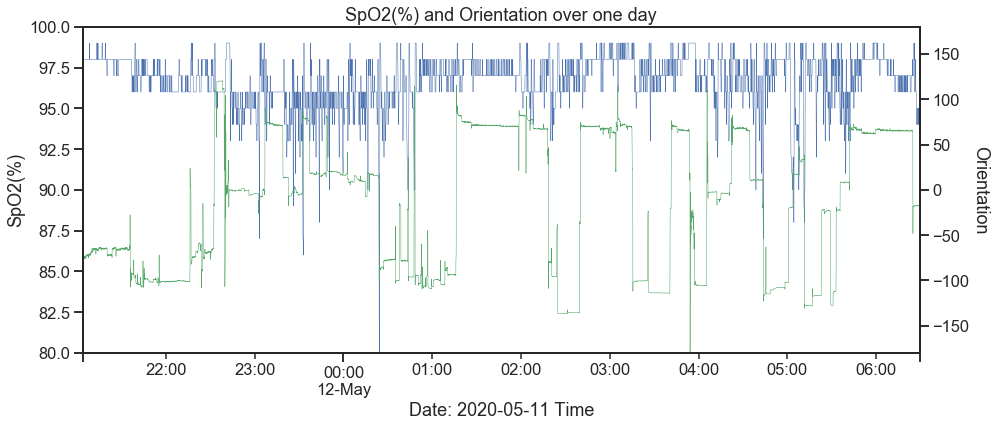

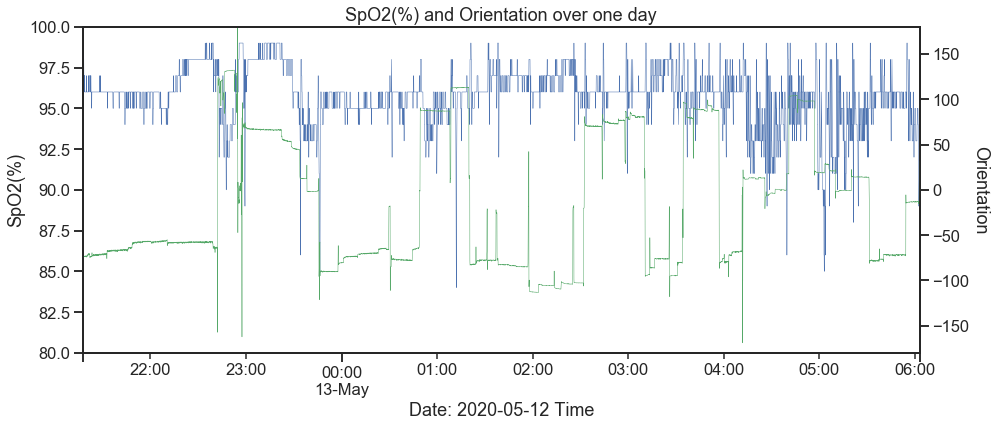

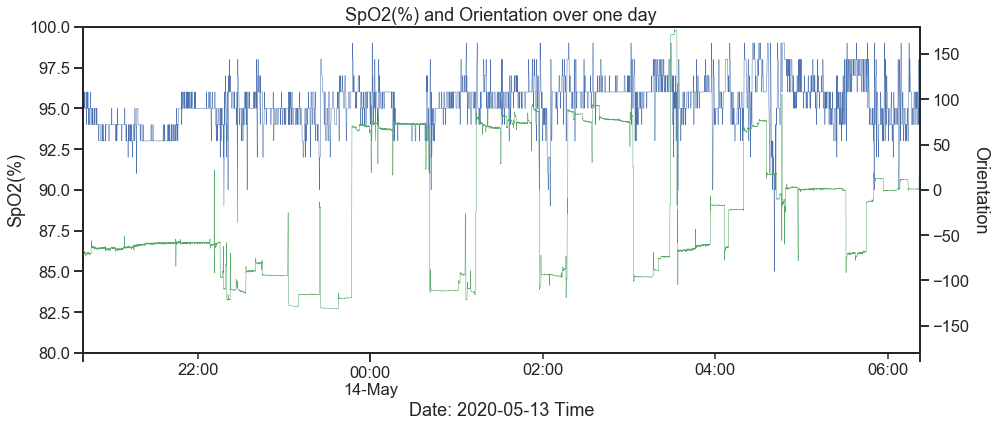

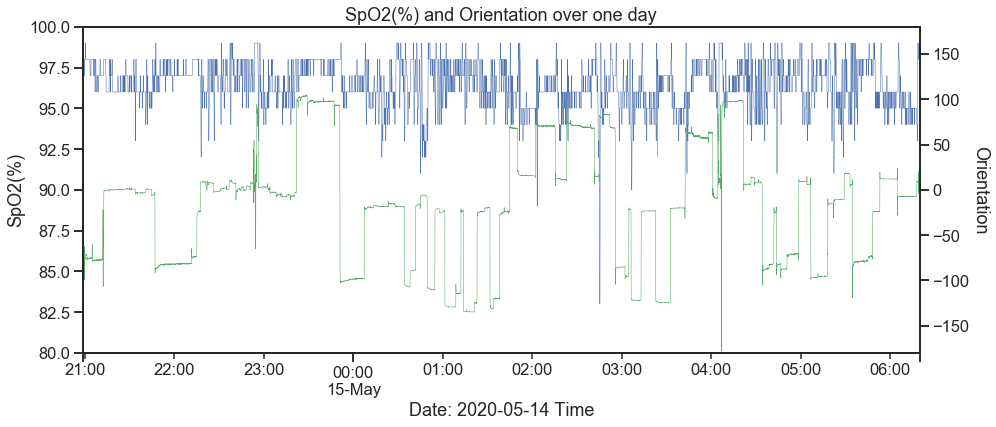

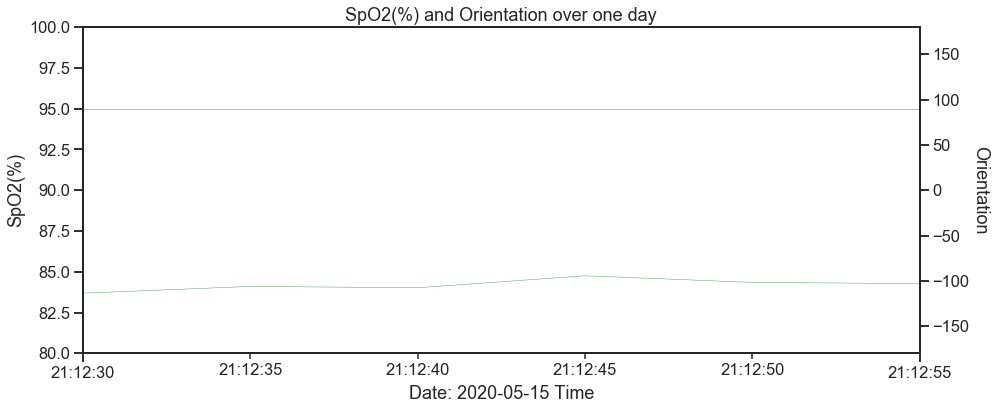

In [6]:
# Plot orientation and spo2 on same graph
for date in dates:
    date_df = df_subset[(df_subset["sleep_night"] == pd.Timestamp(date))]
    if date_df.shape[0] == 0:
        continue
    df_subset['sleep_night'].iloc[0] == date
    date_df['date_i_guess'] = date_df.index
    ax = date_df.plot("date_i_guess", "SpO2(%)", legend=False, linewidth=0.5, figsize=(15, 6))
    ax2 = ax.twinx()
    date_df.plot(x="date_i_guess", y="Orientation", ax=ax2, linewidth=0.5, legend=False, color="g")
    ax.set(ylim=(80, 100))
    plt.title("SpO2(%) and Orientation over one day")
    ax.set_ylabel("SpO2(%)")
    ax2.set_ylabel("Orientation", rotation=270, labelpad=20)
    ax2.set(ylim=(-180, 180))
    ax.set_xlabel("Date: {} Time".format(date))

In [7]:
# Plots are a little choppy, lets make them more clear by putting orientation in 3 buckets
df_subset["Orient_bin"] = None
df_subset.loc[df_subset["Orientation"] > 50, "Orient_bin"] = -1 # Right
df_subset.loc[(df_subset["Orientation"] > -80) & (df_subset["Orientation"] < 30), "Orient_bin"] = 0 # Back
df_subset.loc[(df_subset["Orientation"] > -200) & (df_subset["Orientation"] < -90), "Orient_bin"] = 1 #Left

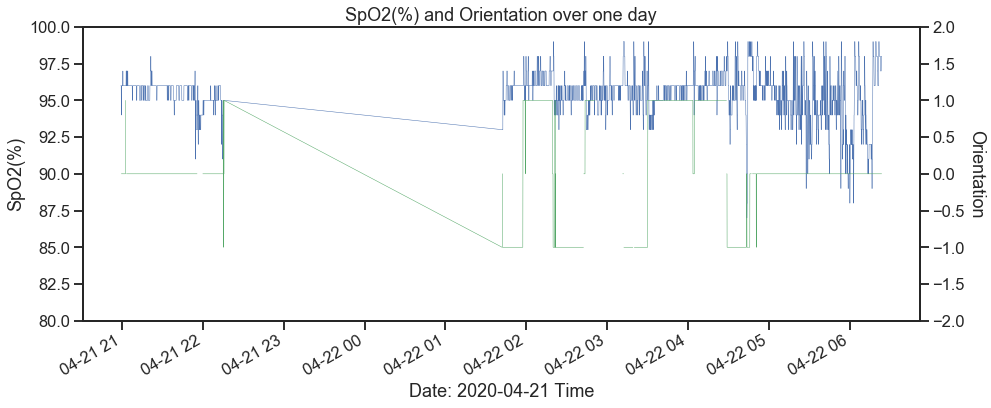

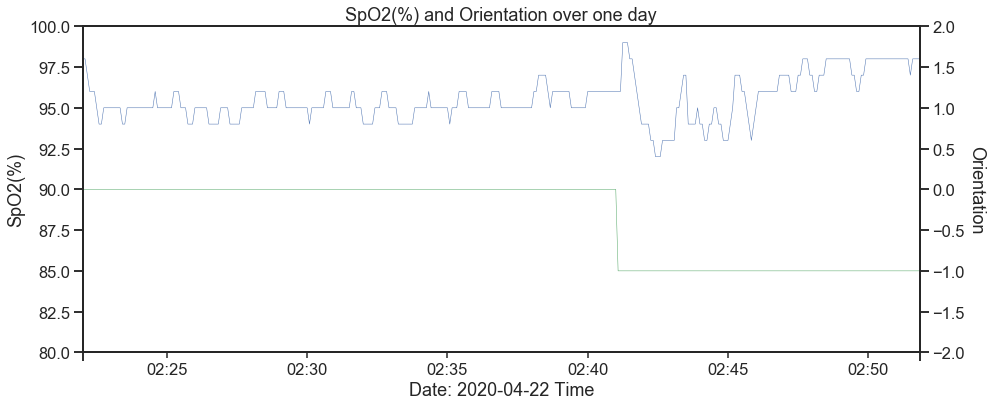

In [ ]:
# Plot orientation and spo2 on same graph
for date in dates:
    date_df = df_subset[(df_subset["sleep_night"] == pd.Timestamp(date))]
    if date_df.shape[0] == 0:
        continue
    df_subset['sleep_night'].iloc[0] == date
    date_df['date_i_guess'] = date_df.index
    ax = date_df.plot("date_i_guess", "SpO2(%)", legend=False, linewidth=0.5, figsize=(15, 6))
    ax2 = ax.twinx()
    date_df.plot(x="date_i_guess", y="Orient_bin", ax=ax2, linewidth=0.5, legend=False, color="g")
    ax.set(ylim=(80, 100))
    plt.title("SpO2(%) and Orientation over one day")
    ax.set_ylabel("SpO2(%)")
    ax2.set_ylabel("Orientation", rotation=270, labelpad=20)
    ax2.set(ylim=(-2, 2))
    ax.set_xlabel("Date: {} Time".format(date))

In [ ]:
# Now let's say a low oxygen effect is below 90
df_subset["low_oxygen"] = 0 # Not low
df_subset.loc[df_subset["SpO2(%)"] <= 90, "low_oxygen"] = 1 # Yes low oxygen

In [ ]:
# Plot orientation and spo2 on same graph
for date in dates:
    date_df = df_subset[(df_subset["sleep_night"] == pd.Timestamp(date))]
    if date_df.shape[0] == 0:
        continue
    df_subset['sleep_night'].iloc[0] == date
    date_df['date_i_guess'] = date_df.index
    ax = date_df.plot("date_i_guess", "low_oxygen", legend=False, linewidth=0.5, figsize=(15, 6))
    ax2 = ax.twinx()
    date_df.plot(x="date_i_guess", y="Orient_bin", ax=ax2, linewidth=0.5, legend=False, color="g")
    ax.set(ylim=(-0.5, 1.5))
    plt.title("Low oxygen and Orientation over one day")
    ax.set_ylabel("Low oxygen")
    ax2.set_ylabel("Orientation", rotation=270, labelpad=20)
    ax2.set(ylim=(-2, 2))
    ax.set_xlabel("Date: {} Time".format(date))

In [ ]:
df_subset.groupby(["low_oxygen", "Orient_bin"]).size()

In [ ]:
# Back sleeping for 50% of time NOT in low oxygen state (defined at > 90% SpO2)
# 0: back, -1: right, 1: left
df_subset["Orient_bin"].loc[(df_subset["low_oxygen"] == 0)].value_counts(normalize=True)

In [ ]:
# Back sleeping for 66% of time IN low oxygen state (defined as <= 90% SpO2)
# 0: back, -1: right, 1: left
df_subset["Orient_bin"].loc[(df_subset["low_oxygen"] == 1)].value_counts(normalize=True)